# Benchmark EDF R&D 

In [1]:
import openturns as ot
import numpy as np
import otbenchmark as otb

In [2]:
import openturns.viewer as otv
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl

We import the list of Reliability Problems

In [3]:
p = otb.mini_Benchmark.problemsliste()

In [4]:
for i in range (np.size(p)):
    print("Name of the problem : ", p[i].getName(), " and his index in the list is ", i + 1,
          " probability exacte is : ", p[i].getProbability())

Name of the problem :  RP8  and his index in the list is  1  probability exacte is :  0.000784
Name of the problem :  RP14  and his index in the list is  2  probability exacte is :  0.00752
Name of the problem :  RP22  and his index in the list is  3  probability exacte is :  0.00416
Name of the problem :  RP24  and his index in the list is  4  probability exacte is :  0.00286
Name of the problem :  RP25  and his index in the list is  5  probability exacte is :  6.14e-06
Name of the problem :  RP28  and his index in the list is  6  probability exacte is :  1.46e-07
Name of the problem :  RP31  and his index in the list is  7  probability exacte is :  0.00018
Name of the problem :  RP33  and his index in the list is  8  probability exacte is :  0.00257
Name of the problem :  RP35  and his index in the list is  9  probability exacte is :  0.00354
Name of the problem :  RP38  and his index in the list is  10  probability exacte is :  0.0081
Name of the problem :  RP53  and his index in th

We can apply the FORM method to all the elements of the list

In [5]:
resultFORM = []
L = np.size(p)
for i in range(L):
    m = otb.mini_Benchmark.FORM(p[i])
    resultFORM.append(m)

We can apply the SORM method to all the elements of the list

In [6]:
resultSORM = []
for i in range(L):
    m = otb.mini_Benchmark.SORM(p[i])
    resultSORM.append(m)

We can apply the Monte Carlo method to all the elements of the list

In [7]:
resultMC = []
for i in range(L):
    m = otb.mini_Benchmark.MonteCarloSampling(p[i], 10000, 0.1)
    resultMC.append(m)

We can apply the ImportanceSampling method to all the elements of the list

In [8]:
resultIS = []
for i in range(L):
    m = otb.mini_Benchmark.ImportanceSampling(p[i])
    resultIS.append(m)

We can apply the SubsetSampling method on all the elements of the list

In [9]:
resultSUBSET = []
L = np.size(p)
for i in range(L):
    m = otb.mini_Benchmark.SubsetSampling(p[i])
    resultSUBSET.append(m)

The following function computes the number of correct base-10 digits in the computed result compared to the exact result.

In [10]:
def computeLogRelativeError(exact, computed):
    logRelativeError = -np.log10(abs(exact - computed) / abs(exact))
    return logRelativeError

In [11]:
def Error(exact, computed):
    logRelativeError = abs(exact - computed) 
    return logRelativeError

the `compareMethode` method takes as a parameter a problem and it returns the probabilities estimated by each method, in addition, it returns the performance of these methods

In [12]:
def CompareMethode(Problem):
    liste = []
    liste1 =[]
    print("Name", Problem.getName())
    print("La probabilité exacte " , Problem.getProbability())
    print("------------------------------------------------------------------")
    print("La probabilité estimée par la méthode SubsetSampling" , otb.mini_Benchmark.SubsetSampling(Problem)[0].getProbabilityEstimate())
    print("Le nombre d'appel à la fonction d'état limite :", otb.mini_Benchmark.SubsetSampling(Problem)[1])
    logRelativeError1 = computeLogRelativeError(Problem.getProbability(), otb.mini_Benchmark.SubsetSampling(Problem)[0].getProbabilityEstimate())
    liste.append(logRelativeError1)
    print("Number of correct digits=%.3f" % (logRelativeError1))
    performance1 = logRelativeError1/otb.mini_Benchmark.SubsetSampling(Problem)[1]
    liste1.append(performance1)
    print("Performance=%.2e (correct digits/evaluation)" % (performance1))
    
    
    
    print("------------------------------------------------------------------")
    print("La probabilité estimée par la méthode FORM" ,otb.mini_Benchmark.FORM(Problem)[0].getEventProbability())
    print("Le nombre d'appel à la fonction d'état limite :", otb.mini_Benchmark.FORM(Problem)[1])
    logRelativeError2 = computeLogRelativeError(Problem.getProbability(), otb.mini_Benchmark.FORM(Problem)[0].getEventProbability())
    liste.append(logRelativeError2)
    print("Number of correct digits=%.3f" % (logRelativeError2))
    performance2 = logRelativeError2/otb.mini_Benchmark.FORM(Problem)[1]
    liste1.append(performance2)
    print("Performance=%.2e (correct digits/evaluation)" % (performance2))
    
    print("--------------------------------------------------------------------")
    print("La probabilité estimée par la méthode SORM-Breitung" ,otb.mini_Benchmark.SORM(Problem)[0].getEventProbabilityBreitung())
    print("La probabilité estimée par la méthode SORM-HohenBichler" ,otb.mini_Benchmark.SORM(Problem)[0].getEventProbabilityHohenBichler())
    print("Le nombre d'appel à la fonction d'état limite :", otb.mini_Benchmark.SORM(Problem)[1])
    logRelativeError3 = computeLogRelativeError(Problem.getProbability(), otb.mini_Benchmark.SORM(Problem)[0].getEventProbabilityBreitung())
    liste.append(logRelativeError3)
    print("Number of correct digits=%.3f" % (logRelativeError3))
    performance3 = logRelativeError3/otb.mini_Benchmark.SORM(Problem)[1]
    liste1.append(performance3)
    print("Performance=%.2e (correct digits/evaluation)" % (performance3))
    
    print("---------------------------------------------------------------------")
    print("La probabilité estimée par ImportanceSampling" , otb.mini_Benchmark.ImportanceSampling(Problem)[0].getProbabilityEstimate())
    print("Le nombre d'appel à la fonction d'état limite :", otb.mini_Benchmark.ImportanceSampling(Problem)[1])
    logRelativeError4 = computeLogRelativeError(Problem.getProbability(), otb.mini_Benchmark.ImportanceSampling(Problem)[0].getProbabilityEstimate())
    liste.append(logRelativeError4)
    print("Number of correct digits=%.3f" % (logRelativeError4))
    performance4 = logRelativeError4/otb.mini_Benchmark.ImportanceSampling(Problem)[1]
    liste1.append(performance4)
    print("Performance=%.2e (correct digits/evaluation)" % (performance4))
    
    print("----------------------------------------------------------------------")
    print("La probabilité estimée par MonteCarloSampling ", otb.mini_Benchmark.MonteCarloSampling(Problem, 10000, 0.1)[0].getProbabilityEstimate())
    print("Le nombre d'appel à la fonction d'état limite :", otb.mini_Benchmark.MonteCarloSampling(Problem, 10000, 0.1)[1])
    x = otb.mini_Benchmark.MonteCarloSampling(Problem, 10000, 0.1)[0].getProbabilityEstimate()
    logRelativeError5 = computeLogRelativeError(Problem.getProbability(), x)
    liste.append(logRelativeError5)
    print("Number of correct digits=%.3f" % (logRelativeError5))
    performance5 = logRelativeError5/otb.mini_Benchmark.MonteCarloSampling(Problem, 10000, 0.1)[1]
    liste1.append(performance5)
    print("Performance=%.2e (correct digits/evaluation)" % (performance5))
    
    
    liste.sort()
    liste1.sort()
    print("------------------------------------------------------------------------")
    print("---Classement méthode par (Nombre de chiffres corrects)------")
    print("------------------------------------------------------------------------")
    print("Classement de la méthode SubsetSampling : ", 5 - liste.index(logRelativeError1))
    print("Classement de la méthode FORM : ", 5 - liste.index(logRelativeError2))
    print("Classement de la méthode SORM : ", 5 - liste.index(logRelativeError3))
    print("Classement de la méthode ImportanceSampling: ", 5 - liste.index(logRelativeError4))
    print("Classement de la méthode MonteCarloSampling : ", 5 - liste.index(logRelativeError5))
    print("------------------------------------------------------------------------")
    print("-------------------Classement méthode par Performance-------------------")
    print("------------------------------------------------------------------------")
    print("Classement de la méthode SubsetSampling : ", 5 - liste1.index(performance1))
    print("Classement de la méthode FORM : ", 5 - liste1.index(performance2))
    print("Classement de la méthode SORM : ", 5 - liste1.index(performance3))
    print("Classement de la méthode ImportanceSampling: ", 5 - liste1.index(performance4))
    print("Classement de la méthode MonteCarloSampling : ", 5 - liste1.index(performance5))
    
    

In [13]:
CompareMethode(p[0])

Name RP8
La probabilité exacte  0.000784
------------------------------------------------------------------
La probabilité estimée par la méthode SubsetSampling 0.0007490988
Le nombre d'appel à la fonction d'état limite : 20000
Number of correct digits=0.536
Performance=2.68e-05 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 0.0006599180884000775
Le nombre d'appel à la fonction d'état limite : 101
Number of correct digits=0.801
Performance=7.93e-03 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 0.0007838449346531113
La probabilité estimée par la méthode SORM-HohenBichler 0.00080074496577501
Le nombre d'appel à la fonction d'état limite : 101
Number of correct digits=3.704
Performance=3.67e-02 (correct digits/evaluation)
---------------------------------------------------------------------
La prob

We apply the function CompareMethode to all the problems of BBRC

In [14]:
def benchmark():
    for i in range(L):
        y = CompareMethode(p[i])
    return y    

In [15]:
benchmark()

Name RP8
La probabilité exacte  0.000784
------------------------------------------------------------------
La probabilité estimée par la méthode SubsetSampling 0.0008914000000000014
Le nombre d'appel à la fonction d'état limite : 20000
Number of correct digits=0.673
Performance=3.37e-05 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 0.0006599180884000775
Le nombre d'appel à la fonction d'état limite : 101
Number of correct digits=0.801
Performance=7.93e-03 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 0.0007838449346531113
La probabilité estimée par la méthode SORM-HohenBichler 0.00080074496577501
Le nombre d'appel à la fonction d'état limite : 101
Number of correct digits=3.704
Performance=3.67e-02 (correct digits/evaluation)
--------------------------------------------------------------------

La probabilité estimée par MonteCarloSampling  0.0021000000000000085
Le nombre d'appel à la fonction d'état limite : 10000
Number of correct digits=1.854
Performance=1.85e-04 (correct digits/evaluation)
------------------------------------------------------------------------
---Classement méthode par (Nombre de chiffres corrects)------
------------------------------------------------------------------------
Classement de la méthode SubsetSampling :  3
Classement de la méthode FORM :  5
Classement de la méthode SORM :  4
Classement de la méthode ImportanceSampling:  2
Classement de la méthode MonteCarloSampling :  1
------------------------------------------------------------------------
-------------------Classement méthode par Performance-------------------
------------------------------------------------------------------------
Classement de la méthode SubsetSampling :  3
Classement de la méthode FORM :  5
Classement de la méthode SORM :  4
Classement de la méthode ImportanceSampling

Le nombre d'appel à la fonction d'état limite : 15000
Number of correct digits=0.979
Performance=6.52e-05 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 0.0013543357258094712
Le nombre d'appel à la fonction d'état limite : 88
Number of correct digits=0.325
Performance=3.69e-03 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 0.0013543357258094712
La probabilité estimée par la méthode SORM-HohenBichler 0.0013543357258094712
Le nombre d'appel à la fonction d'état limite : 113
Number of correct digits=0.325
Performance=2.88e-03 (correct digits/evaluation)
---------------------------------------------------------------------
La probabilité estimée par ImportanceSampling 0.0028434656029724392
Le nombre d'appel à la fonction d'état limite : 2870
Number of correct digits=0.370
Performance=1.23e-04 (correc

La probabilité estimée par ImportanceSampling 0.5670564591027913
Le nombre d'appel à la fonction d'état limite : 126
Number of correct digits=0.161
Performance=1.17e-03 (correct digits/evaluation)
----------------------------------------------------------------------
La probabilité estimée par MonteCarloSampling  0.5217391304347827
Le nombre d'appel à la fonction d'état limite : 69
Number of correct digits=0.165
Performance=2.71e-03 (correct digits/evaluation)
------------------------------------------------------------------------
---Classement méthode par (Nombre de chiffres corrects)------
------------------------------------------------------------------------
Classement de la méthode SubsetSampling :  3
Classement de la méthode FORM :  2
Classement de la méthode SORM :  1
Classement de la méthode ImportanceSampling:  5
Classement de la méthode MonteCarloSampling :  4
------------------------------------------------------------------------
-------------------Classement méthode par 

Le nombre d'appel à la fonction d'état limite : 35000
Number of correct digits=0.689
Performance=1.97e-05 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 2.8706928777051813e-07
Le nombre d'appel à la fonction d'état limite : 101
Number of correct digits=1.772
Performance=1.75e-02 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 2.8706928777051813e-07
La probabilité estimée par la méthode SORM-HohenBichler 2.8706928777051813e-07
Le nombre d'appel à la fonction d'état limite : 101
Number of correct digits=1.772
Performance=1.75e-02 (correct digits/evaluation)
---------------------------------------------------------------------
La probabilité estimée par ImportanceSampling 2.719918459733478e-07
Le nombre d'appel à la fonction d'état limite : 573
Number of correct digits=0.980
Performance=1.42e-03 (cor

La probabilité estimée par la méthode SubsetSampling 0.0006440000000000011
Le nombre d'appel à la fonction d'état limite : 20000
Number of correct digits=0.542
Performance=2.71e-05 (correct digits/evaluation)
------------------------------------------------------------------
La probabilité estimée par la méthode FORM 0.013940300931039127
Le nombre d'appel à la fonction d'état limite : 111
Number of correct digits=-1.279
Performance=-1.15e-02 (correct digits/evaluation)
--------------------------------------------------------------------
La probabilité estimée par la méthode SORM-Breitung 0.013966048455594467
La probabilité estimée par la méthode SORM-HohenBichler 0.013970176419027574
Le nombre d'appel à la fonction d'état limite : 172
Number of correct digits=-1.280
Performance=-7.44e-03 (correct digits/evaluation)
---------------------------------------------------------------------
La probabilité estimée par ImportanceSampling 0.0007829524574249615
Le nombre d'appel à la fonction d'é

we can also show the convergence graphs ( for example Problem57)

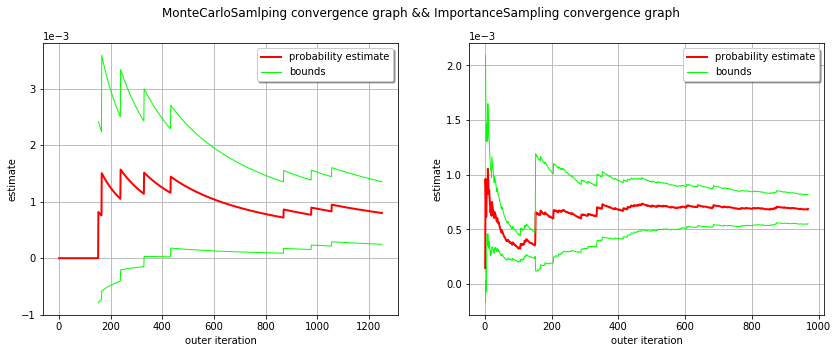

In [16]:
graph1 = otb.mini_Benchmark.MonteCarloSampling(p[1], 10000, 0.1)[2]
graph2 = otb.mini_Benchmark.ImportanceSampling(p[1])[2]
fig = pl.figure(figsize=(14, 5))
ax_1 = fig.add_subplot(1, 2, 1)
_ = otv.View(graph1, figure=fig, axes=[ax_1])
ax_2 = fig.add_subplot(1, 2, 2)
_ = otv.View(graph2, figure=fig, axes=[ax_2])
_ = fig.suptitle("MonteCarloSamlping convergence graph && ImportanceSampling convergence graph")


In [17]:
# index of RP
i = 14

x = [1, 2, 3, 4, 5, 6]
a1 = otb.mini_Benchmark.FORM(p[i])[0].getEventProbability()
a2 = otb.mini_Benchmark.SORM(p[i])[0].getEventProbabilityBreitung()
a3 = otb.mini_Benchmark.ImportanceSampling(p[i])[0].getProbabilityEstimate()
a4 = otb.mini_Benchmark.SubsetSampling(p[i])[0].getProbabilityEstimate()
a5 = otb.mini_Benchmark.MonteCarloSampling(p[i], 10000, 0.1)[0].getProbabilityEstimate()
a6 = p[i].getProbability()

y = [a1, a2, a3, a4, a5, a6]

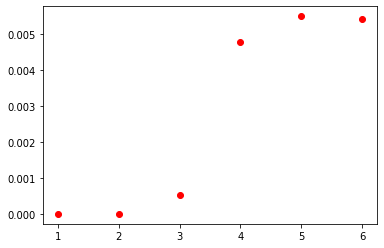

In [18]:
plt.plot(x, y, 'ro')
plt.show()

# Remarques

* On remarque que les méthodes FORM et SORM sont plus rapides, mais, elles ne converges pas vers la proba exacte.
* On remarque aussi l'efficacité de la méthode ImpotanceSampling ( méthode pas couteuse, et converge).
* La convergence de la méthode de MonteCarlo nécisssite un grand nombre de simulation.
* SubsetSampling converge même si la probabilité est très faible.
* pour RP14 SORM ne marche pas, et aussi ImportanceSampling.
* pour RP91 Subset ne marche pas.


# Hypothèse
* Pour des fonctions objectives de forme polynômial, ImprotanceSampling est la plus efficace.
* Pour des fonctions plus complexes, MonteCarlo reste efficace.

 # you have ideas to complete this work !!!